# Gab Model 1.0
2020.10.10

Use the data extract from gab.ai website to train a model, and test it on two data sets.

Student: Xuanyu Su                                                                 
Supervisor: Isar Nejadgholi

In [1]:
import pandas as pd
GAB = pd.read_csv('Data/GabHateCorpus_annotations.tsv', encoding='utf-8',sep='\t')

In [2]:
GAB.head()

,ID,Annotator,Text,Hate,HD,CV,VO,REL,RAE,SXO,GEN,IDL,NAT,POL,MPH,EX,IM
0,27044,4,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27044,15,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27044,10,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27044,8,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27045,4,Get the new Android app update released today ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
[print(i) for i in GAB.loc[:15]['Text']][0]

Ah the PSYOPS antifa crew is back. That’s how I know we are winning.
Ah the PSYOPS antifa crew is back. That’s how I know we are winning.
Ah the PSYOPS antifa crew is back. That’s how I know we are winning.
Ah the PSYOPS antifa crew is back. That’s how I know we are winning.
Get the new Android app update released today here: https://gab.ai/about/android
Get the new Android app update released today here: https://gab.ai/about/android
Get the new Android app update released today here: https://gab.ai/about/android
Study: Google Pushes Liberal News in Top 5 Search Suggestions https://www.newsbusters.org/blogs/techwatch/corinn...
Study: Google Pushes Liberal News in Top 5 Search Suggestions https://www.newsbusters.org/blogs/techwatch/corinn...
Study: Google Pushes Liberal News in Top 5 Search Suggestions https://www.newsbusters.org/blogs/techwatch/corinn...
Study: Google Pushes Liberal News in Top 5 Search Suggestions https://www.newsbusters.org/blogs/techwatch/corinn...
#Breaking: Claimi

In [4]:
new_label = GAB.groupby('ID')['Hate'].mean() > 0.5

In [5]:
temp = []
for i in new_label:
    if i is True:
        temp.append(1.0)
    else:
        temp.append(0.0)
new_label = temp

In [6]:
new_GAB = GAB.drop_duplicates(subset=['ID'])

In [7]:
new_GAB['Hate'] = temp

<ipython-input-7-a2733beb0c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_GAB['Hate'] = temp


In [8]:
new_GAB = new_GAB[['Text','Hate']]

In [9]:
new_GAB.head()

,Text,Hate
0,Ah the PSYOPS antifa crew is back. That’s how ...,0.0
4,Get the new Android app update released today ...,0.0
7,Study: Google Pushes Liberal News in Top 5 Sea...,0.0
11,#Breaking: Claiming bias against conservatives...,1.0
15,"“These [companies] are run by sociopaths,” he ...",0.0


In [10]:
new_GAB = new_GAB.reset_index(drop = True)

In [11]:
[print(i) for i in new_GAB.loc[30:35]['Text']][0]

'Through the Arches, Mission San Juan Capistrano' 🖼️   by Joseph Kleitsch  #fineart #architecture #impressionism
'Look Maggie, I'm walkin, Maggie' 😇😍   https://youtu.be/whS9K5rL_FU  #cuteness #babyfever
'Night Slid Down' by Emma Florence Harrison 🎨   #ArtNouveau #illustration #MotherhoodInArt #NightSky
'Old laguna' by Joseph Kleitsch 🇭🇺🇺🇸  #arte #impressionist #landscape #StreetScene #ColorfulArt
🎨 Joseph Kleitsch, selfportrait   (Hungarian - American, 1885-1931)    #selfie #MenInArt #hats #painter
'Under the sun' by Joseph Kleitsch 🇭🇺🇺🇸  #art #impressionism #ColorfulArt #gardens #fineart #WomenInArt


In [36]:
str(new_GAB.loc[31]['Text'])

"'Look Maggie, I'm walkin, Maggie' 😇😍   https://youtu.be/whS9K5rL_FU  #cuteness #babyfever"

In [70]:
new_sam = str(new_GAB.loc[31]['Text'])[:35] + ' ' + str(new_GAB.loc[31]['Text'])[35:]
new_sam

"'Look Maggie, I'm walkin, Maggie' 😇 😍   https://youtu.be/whS9K5rL_FU  #cuteness #babyfever"

In [ ]:
import re
from tqdm import tqdm
import emoji

class Word_Preprocessing():
    def eliminate_url(self,df,target):
        print('Start eliminate url: : )')
        df_temp = df
        target_column_name = target
        text = df_temp[target_column_name]
        for i in tqdm(text):
            urls = re.findall(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', i)
            for i in urls:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def eliminate_username(self,df,target):
        print('Start eliminate username: : )')
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'@\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    
    def eliminate_hashtag(self, df, target):
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'#\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def eliminate_symbol(self,df,target):
        print('Start eliminate symbol: : )')
        df_temp = df
        target_column_name = target
        symbol_list = ['!','@','#','$','%','^','&','*','(',')','-','+','?','>','<','=','/','.',':',';','  ','   ','    ','      ','      ','  ']
        for i in tqdm(symbol_list):
            df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ' '))
        return df_temp
    
    def to_Lower(self,df,target):
        df_temp = df
        target_column_name = target
        print('Start eliminate lower: : )')
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x:re.sub(r'[^A-Za-z0-9 ]+', ' ', x).lower())
        return df_temp
    
    def eliminate_emoji(self,df,target):
        print('Start transfer emoji: : )')
        df_temp = df
        target_column_name = target
        preprocessed_text = []
        df_temp[target_column_name] = df_temp.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
        return df_temp
    
    def process_all(self, df,target):
        df_temp = df
        target_column_name = target
        df_remove_url = self.eliminate_url(df_temp,target_column_name)
        df_transfer_emoji = self.eliminate_emoji(df_remove_url, target_column_name)
        df_eliminate_hashtag = self.eliminate_hashtag(df_transfer_emoji, target_column_name)
        df_remove_username = self.eliminate_username(df_eliminate_hashtag, target_column_name)
        df_remove_symbol = self.eliminate_symbol(df_remove_username, target_column_name)
        df_to_lower = self.to_Lower(df_remove_symbol, target_column_name)
        print("finished!!")
        return df_to_lower
          

In [77]:
from transformers import BertTokenizer, BertForNextSentencePrediction,XLNetTokenizer
import torch
tokenizer =  XLNetTokenizer.from_pretrained('xlnet-base-cased')
inputs = tokenizer.tokenize(new_sam)

In [78]:
inputs

['▁',
 "'",
 'Look',
 '▁Maggie',
 ',',
 '▁I',
 "'",
 'm',
 '▁walk',
 'in',
 ',',
 '▁Maggie',
 "'",
 '▁',
 '😇',
 '▁',
 '😍',
 '▁http',
 's',
 '://',
 'you',
 'tu',
 '.',
 'be',
 '/',
 'w',
 'h',
 'S',
 '9',
 'K',
 '5',
 'r',
 'L',
 '_',
 'FU',
 '▁',
 '#',
 'cut',
 'e',
 'ness',
 '▁',
 '#',
 'baby',
 'f',
 'ever']

In [57]:
import numpy as np
temp = np.array(inputs.input_ids)
len(temp[0])

3

In [13]:
preprocessor = Word_Preprocessing()

In [14]:
final_data = preprocessor.process_all(new_GAB, 'Text')

  0%|                                                                                        | 0/27665 [00:00<?, ?it/s]

Start eliminate url: : )


  0%|                                                                                        | 0/27665 [00:00<?, ?it/s]

Start transfer emoji: : )


  1%|▋                                                                           | 239/27665 [00:00<00:12, 2184.56it/s]

Start eliminate username: : )


 96%|█████████████████████████████████████████████████████████████████████████████▉   | 25/26 [00:00<00:00, 129.02it/s]

Start eliminate symbol: : )


100%|█████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 119.31it/s]

Start eliminate lower: : )
finished!!


In [16]:
final_data = preprocessor.eliminate_symbol(final_data, 'Text')

 62%|█████████████████████████████████████████████████▊                               | 16/26 [00:00<00:00, 155.72it/s]

Start eliminate symbol: : )


100%|█████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 133.44it/s]


In [17]:
[print(i) for i in final_data.loc[30:35]['Text']][0]

 through the arches mission san juan capistrano by joseph kleitsch 
 look maggie i m walkin maggie 
 night slid down by emma florence harrison 
 old laguna by joseph kleitsch 
 joseph kleitsch selfportrait hungarian american 1885 1931 
 under the sun by joseph kleitsch 


In [18]:
text = final_data['Text']
label = final_data['Hate']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)

In [20]:
x_test, x_valid, y_text, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [21]:
def pack_data(text, label,name):
    GAB = {'text':text,'hate':label}
    GAB_final = pd.DataFrame(GAB)
    file_name = name+'.csv'
    GAB_final.to_csv(file_name,index=False,header=True)

In [22]:
pack_data(x_train, y_train, 'Data/GABtrain')
pack_data(x_test, y_text, 'Data/GABtest')
pack_data(x_valid, y_valid, 'Data/GABvalid')

In [23]:
source_folder = 'Data'
destination_folder = 'Model'

In [24]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import torch
import transformers
# Preliminaries

from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [26]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

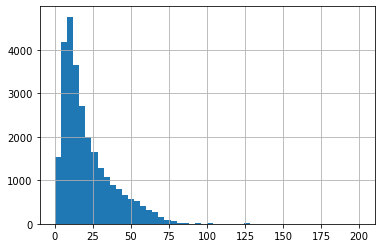

In [27]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in final_data['Text']]
pd.Series(seq_len).hist(bins = 50,range=[0,200])

In [28]:
# Model parameter
MAX_SEQ_LEN = 75
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('text', text_field),('hate', label_field)]

# TabularDataset

train, valid, test = TabularDataset.splits(path=source_folder, train='GABtrain.csv', validation='GABvalid.csv',
                                           test='GABtest.csv', format='CSV', fields=fields, skip_header=True)


train_iter = BucketIterator(train, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

In [29]:
class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]
        

        return loss, text_fea

In [30]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [31]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 10,
          eval_every = len(train_iter) // 2,
          file_path = destination_folder,
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        batch_no = 1
        for (text, hate), _ in train_loader:
            hate = hate.type(torch.LongTensor)           
            hate = hate.to(device)
            text = text.type(torch.LongTensor)  
            text = text.to(device)
            output = model(text, hate)
            loss, _ = output
            print('batch_no [{}/{}]:'.format(batch_no, int(len(x_train)/16)),'training_loss:',loss)
            batch_no+=1
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for (text, hate), _ in valid_loader:
                        hate = hate.type(torch.LongTensor)           
                        hate = hate.to(device)
                        text = text.type(torch.LongTensor)  
                        text = text.to(device)
                        output = model(text, hate)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

In [32]:
from transformers import AdamW
model = BERT().to(device)
no_decay = ['bias', 'LayerNorm.weight']    
optimizer_grouped_parameters = [
{'params': [p for n,p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
{'params': [p for n,p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train(model=model, optimizer=optimizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

batch_no [1/1383]: training_loss: tensor(0.5401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2/1383]: training_loss: tensor(0.4900, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3/1383]: training_loss: tensor(0.3174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4/1383]: training_loss: tensor(0.4972, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [5/1383]: training_loss: tensor(0.3287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [6/1383]: training_loss: tensor(0.3031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [7/1383]: training_loss: tensor(0.1898, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [8/1383]: training_loss: tensor(0.3912, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [9/1383]: training_loss: tensor(0.3928, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [10/1383]: training_loss: tensor(0.1435, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [11/1383]: training_loss: tensor(0.2275, device='cuda:0', gr

batch_no [89/1383]: training_loss: tensor(0.2524, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [90/1383]: training_loss: tensor(0.3610, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [91/1383]: training_loss: tensor(0.1219, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [92/1383]: training_loss: tensor(0.4993, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [93/1383]: training_loss: tensor(0.3736, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [94/1383]: training_loss: tensor(0.2603, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [95/1383]: training_loss: tensor(0.2501, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [96/1383]: training_loss: tensor(0.2434, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [97/1383]: training_loss: tensor(0.5170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [98/1383]: training_loss: tensor(0.2441, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [99/1383]: training_loss: tensor(0.3576, device='cu

batch_no [262/1383]: training_loss: tensor(0.6569, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [263/1383]: training_loss: tensor(0.6386, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [264/1383]: training_loss: tensor(0.2352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [265/1383]: training_loss: tensor(0.1205, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [266/1383]: training_loss: tensor(0.2497, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [267/1383]: training_loss: tensor(0.2472, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [268/1383]: training_loss: tensor(0.1041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [269/1383]: training_loss: tensor(0.5276, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [270/1383]: training_loss: tensor(0.3832, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [271/1383]: training_loss: tensor(0.5411, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [272/1383]: training_loss: tensor(0.6725,

batch_no [349/1383]: training_loss: tensor(0.3985, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [350/1383]: training_loss: tensor(0.0843, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [351/1383]: training_loss: tensor(0.2324, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [352/1383]: training_loss: tensor(0.2423, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [353/1383]: training_loss: tensor(0.3904, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [354/1383]: training_loss: tensor(0.3964, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [355/1383]: training_loss: tensor(0.2479, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [356/1383]: training_loss: tensor(0.4026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [357/1383]: training_loss: tensor(0.0892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [358/1383]: training_loss: tensor(0.2365, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [359/1383]: training_loss: tensor(0.2360,

batch_no [436/1383]: training_loss: tensor(0.5735, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [437/1383]: training_loss: tensor(0.0570, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [438/1383]: training_loss: tensor(0.0620, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [439/1383]: training_loss: tensor(0.2461, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [440/1383]: training_loss: tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [441/1383]: training_loss: tensor(0.3827, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [442/1383]: training_loss: tensor(0.5822, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [443/1383]: training_loss: tensor(0.2319, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [444/1383]: training_loss: tensor(0.7959, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [445/1383]: training_loss: tensor(0.0578, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [446/1383]: training_loss: tensor(0.4056,

batch_no [523/1383]: training_loss: tensor(0.0965, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [524/1383]: training_loss: tensor(0.4005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [525/1383]: training_loss: tensor(0.0969, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [526/1383]: training_loss: tensor(0.5254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [527/1383]: training_loss: tensor(0.2270, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [528/1383]: training_loss: tensor(0.3972, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [529/1383]: training_loss: tensor(0.0929, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [530/1383]: training_loss: tensor(0.2558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [531/1383]: training_loss: tensor(0.5294, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [532/1383]: training_loss: tensor(0.3983, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [533/1383]: training_loss: tensor(0.2150,

batch_no [610/1383]: training_loss: tensor(0.2263, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [611/1383]: training_loss: tensor(0.5289, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [612/1383]: training_loss: tensor(0.2260, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [613/1383]: training_loss: tensor(0.0774, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [614/1383]: training_loss: tensor(0.3935, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [615/1383]: training_loss: tensor(0.2352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [616/1383]: training_loss: tensor(0.2392, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [617/1383]: training_loss: tensor(0.2381, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [618/1383]: training_loss: tensor(0.3945, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [619/1383]: training_loss: tensor(0.2386, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [620/1383]: training_loss: tensor(0.3711,

batch_no [695/1383]: training_loss: tensor(0.2343, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [696/1383]: training_loss: tensor(0.3775, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [697/1383]: training_loss: tensor(0.2500, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [698/1383]: training_loss: tensor(0.0749, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [699/1383]: training_loss: tensor(0.5411, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [700/1383]: training_loss: tensor(0.0731, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [701/1383]: training_loss: tensor(0.3542, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [702/1383]: training_loss: tensor(0.2307, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [703/1383]: training_loss: tensor(0.5189, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [704/1383]: training_loss: tensor(0.0739, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [705/1383]: training_loss: tensor(0.5294,

batch_no [782/1383]: training_loss: tensor(0.0840, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [783/1383]: training_loss: tensor(0.3922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [784/1383]: training_loss: tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [785/1383]: training_loss: tensor(0.5582, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [786/1383]: training_loss: tensor(0.2164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [787/1383]: training_loss: tensor(0.2117, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [788/1383]: training_loss: tensor(0.5257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [789/1383]: training_loss: tensor(0.0964, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [790/1383]: training_loss: tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [791/1383]: training_loss: tensor(0.0952, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [792/1383]: training_loss: tensor(0.2476,

batch_no [869/1383]: training_loss: tensor(0.3833, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [870/1383]: training_loss: tensor(0.2437, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [871/1383]: training_loss: tensor(0.2268, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [872/1383]: training_loss: tensor(0.0896, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [873/1383]: training_loss: tensor(0.2401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [874/1383]: training_loss: tensor(0.0942, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [875/1383]: training_loss: tensor(0.0934, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [876/1383]: training_loss: tensor(0.5190, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [877/1383]: training_loss: tensor(0.4098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [878/1383]: training_loss: tensor(0.2471, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [879/1383]: training_loss: tensor(0.2334,

batch_no [956/1383]: training_loss: tensor(0.0770, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [957/1383]: training_loss: tensor(0.0737, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/1383]: training_loss: tensor(0.4163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [959/1383]: training_loss: tensor(0.4118, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [960/1383]: training_loss: tensor(0.2397, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [961/1383]: training_loss: tensor(0.2326, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [962/1383]: training_loss: tensor(0.3789, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [963/1383]: training_loss: tensor(0.2192, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [964/1383]: training_loss: tensor(0.2432, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [965/1383]: training_loss: tensor(0.0773, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [966/1383]: training_loss: tensor(0.0806,

batch_no [1043/1383]: training_loss: tensor(0.0696, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/1383]: training_loss: tensor(0.2432, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1045/1383]: training_loss: tensor(0.9185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1046/1383]: training_loss: tensor(0.7184, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1047/1383]: training_loss: tensor(0.5685, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1048/1383]: training_loss: tensor(0.2453, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1049/1383]: training_loss: tensor(0.5599, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1050/1383]: training_loss: tensor(0.2538, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1051/1383]: training_loss: tensor(0.3978, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1052/1383]: training_loss: tensor(0.2128, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1053/1383]: training_loss: ten

batch_no [1129/1383]: training_loss: tensor(0.4025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1130/1383]: training_loss: tensor(0.4133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1131/1383]: training_loss: tensor(0.2320, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1132/1383]: training_loss: tensor(0.0702, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1133/1383]: training_loss: tensor(0.3972, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1134/1383]: training_loss: tensor(0.3988, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1135/1383]: training_loss: tensor(0.5464, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1136/1383]: training_loss: tensor(0.0733, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1137/1383]: training_loss: tensor(0.2391, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1138/1383]: training_loss: tensor(0.7059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1139/1383]: training_loss: ten

batch_no [1300/1383]: training_loss: tensor(0.2585, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1301/1383]: training_loss: tensor(0.1014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1302/1383]: training_loss: tensor(0.3870, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1303/1383]: training_loss: tensor(0.2435, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1304/1383]: training_loss: tensor(0.3833, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1305/1383]: training_loss: tensor(0.2403, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1306/1383]: training_loss: tensor(0.5384, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1307/1383]: training_loss: tensor(0.3905, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1308/1383]: training_loss: tensor(0.3863, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1309/1383]: training_loss: tensor(0.3765, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1310/1383]: training_loss: ten

batch_no [2/1383]: training_loss: tensor(0.3949, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3/1383]: training_loss: tensor(0.0763, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4/1383]: training_loss: tensor(0.5445, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [5/1383]: training_loss: tensor(0.2361, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [6/1383]: training_loss: tensor(0.2401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [7/1383]: training_loss: tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [8/1383]: training_loss: tensor(0.3985, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [9/1383]: training_loss: tensor(0.3977, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [10/1383]: training_loss: tensor(0.0773, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [11/1383]: training_loss: tensor(0.2504, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [12/1383]: training_loss: tensor(0.0855, device='cuda:0', g

batch_no [90/1383]: training_loss: tensor(0.3753, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [91/1383]: training_loss: tensor(0.1103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [92/1383]: training_loss: tensor(0.5070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [93/1383]: training_loss: tensor(0.3944, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [94/1383]: training_loss: tensor(0.2634, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [95/1383]: training_loss: tensor(0.2437, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [96/1383]: training_loss: tensor(0.2399, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [97/1383]: training_loss: tensor(0.5115, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [98/1383]: training_loss: tensor(0.2436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [99/1383]: training_loss: tensor(0.3784, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [100/1383]: training_loss: tensor(0.5294, device='c

batch_no [177/1383]: training_loss: tensor(0.3876, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [178/1383]: training_loss: tensor(0.4028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [179/1383]: training_loss: tensor(0.0670, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [180/1383]: training_loss: tensor(0.4006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [181/1383]: training_loss: tensor(0.0737, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [182/1383]: training_loss: tensor(0.0745, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [183/1383]: training_loss: tensor(0.4222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [184/1383]: training_loss: tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [185/1383]: training_loss: tensor(0.0719, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [186/1383]: training_loss: tensor(0.5657, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [187/1383]: training_loss: tensor(0.2428,

batch_no [264/1383]: training_loss: tensor(0.2394, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [265/1383]: training_loss: tensor(0.1039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [266/1383]: training_loss: tensor(0.2501, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [267/1383]: training_loss: tensor(0.2341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [268/1383]: training_loss: tensor(0.1052, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [269/1383]: training_loss: tensor(0.5210, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [270/1383]: training_loss: tensor(0.3633, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [271/1383]: training_loss: tensor(0.5226, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [272/1383]: training_loss: tensor(0.6517, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [273/1383]: training_loss: tensor(0.1126, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [274/1383]: training_loss: tensor(0.1104,

batch_no [351/1383]: training_loss: tensor(0.2227, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [352/1383]: training_loss: tensor(0.2457, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [353/1383]: training_loss: tensor(0.3923, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [354/1383]: training_loss: tensor(0.3743, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [355/1383]: training_loss: tensor(0.2468, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [356/1383]: training_loss: tensor(0.3746, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [357/1383]: training_loss: tensor(0.0789, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [358/1383]: training_loss: tensor(0.2493, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [359/1383]: training_loss: tensor(0.2192, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [360/1383]: training_loss: tensor(0.5423, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [361/1383]: training_loss: tensor(0.2215,

batch_no [524/1383]: training_loss: tensor(0.4002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [525/1383]: training_loss: tensor(0.1013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [526/1383]: training_loss: tensor(0.5233, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [527/1383]: training_loss: tensor(0.2450, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [528/1383]: training_loss: tensor(0.3928, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [529/1383]: training_loss: tensor(0.0955, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [530/1383]: training_loss: tensor(0.2543, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [531/1383]: training_loss: tensor(0.5492, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [532/1383]: training_loss: tensor(0.3929, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [533/1383]: training_loss: tensor(0.2422, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [534/1383]: training_loss: tensor(0.2339,

batch_no [611/1383]: training_loss: tensor(0.5287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [612/1383]: training_loss: tensor(0.2229, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [613/1383]: training_loss: tensor(0.0900, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [614/1383]: training_loss: tensor(0.3998, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [615/1383]: training_loss: tensor(0.2263, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [616/1383]: training_loss: tensor(0.2379, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [617/1383]: training_loss: tensor(0.2447, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [618/1383]: training_loss: tensor(0.3975, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [619/1383]: training_loss: tensor(0.2422, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [620/1383]: training_loss: tensor(0.3897, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [621/1383]: training_loss: tensor(0.2407,

batch_no [697/1383]: training_loss: tensor(0.2344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [698/1383]: training_loss: tensor(0.0768, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [699/1383]: training_loss: tensor(0.5369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [700/1383]: training_loss: tensor(0.0839, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [701/1383]: training_loss: tensor(0.3927, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [702/1383]: training_loss: tensor(0.2262, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [703/1383]: training_loss: tensor(0.5400, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [704/1383]: training_loss: tensor(0.0782, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [705/1383]: training_loss: tensor(0.5994, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [706/1383]: training_loss: tensor(0.3943, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [707/1383]: training_loss: tensor(0.2373,

batch_no [870/1383]: training_loss: tensor(0.2466, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [871/1383]: training_loss: tensor(0.2492, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [872/1383]: training_loss: tensor(0.0894, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [873/1383]: training_loss: tensor(0.2419, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [874/1383]: training_loss: tensor(0.0887, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [875/1383]: training_loss: tensor(0.0874, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [876/1383]: training_loss: tensor(0.5557, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [877/1383]: training_loss: tensor(0.3889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [878/1383]: training_loss: tensor(0.2443, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [879/1383]: training_loss: tensor(0.2366, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [880/1383]: training_loss: tensor(0.4006,

batch_no [957/1383]: training_loss: tensor(0.0742, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/1383]: training_loss: tensor(0.4093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [959/1383]: training_loss: tensor(0.4082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [960/1383]: training_loss: tensor(0.2395, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [961/1383]: training_loss: tensor(0.2369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [962/1383]: training_loss: tensor(0.4019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [963/1383]: training_loss: tensor(0.2371, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [964/1383]: training_loss: tensor(0.2467, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [965/1383]: training_loss: tensor(0.0759, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [966/1383]: training_loss: tensor(0.0735, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [967/1383]: training_loss: tensor(0.3921,

batch_no [1043/1383]: training_loss: tensor(0.0711, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/1383]: training_loss: tensor(0.2153, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1045/1383]: training_loss: tensor(0.8436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1046/1383]: training_loss: tensor(0.7119, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1047/1383]: training_loss: tensor(0.5508, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1048/1383]: training_loss: tensor(0.2157, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1049/1383]: training_loss: tensor(0.5620, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1050/1383]: training_loss: tensor(0.2393, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1051/1383]: training_loss: tensor(0.3985, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1052/1383]: training_loss: tensor(0.2381, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1053/1383]: training_loss: ten

batch_no [1213/1383]: training_loss: tensor(0.2212, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1214/1383]: training_loss: tensor(0.0729, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1215/1383]: training_loss: tensor(0.2472, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1216/1383]: training_loss: tensor(0.5384, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1217/1383]: training_loss: tensor(0.0890, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1218/1383]: training_loss: tensor(0.0857, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1219/1383]: training_loss: tensor(0.5458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1220/1383]: training_loss: tensor(0.0836, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1221/1383]: training_loss: tensor(0.3806, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1222/1383]: training_loss: tensor(0.2553, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1223/1383]: training_loss: ten

batch_no [1299/1383]: training_loss: tensor(0.3776, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1300/1383]: training_loss: tensor(0.2511, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1301/1383]: training_loss: tensor(0.1071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1302/1383]: training_loss: tensor(0.3922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1303/1383]: training_loss: tensor(0.2417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1304/1383]: training_loss: tensor(0.3804, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1305/1383]: training_loss: tensor(0.2263, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1306/1383]: training_loss: tensor(0.5377, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1307/1383]: training_loss: tensor(0.3863, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1308/1383]: training_loss: tensor(0.3720, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1309/1383]: training_loss: ten

Epoch [2/10], Step [2768/13840], Train Loss: 0.2841, Valid Loss: 0.2955
batch_no [1/1383]: training_loss: tensor(0.0816, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2/1383]: training_loss: tensor(0.3876, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3/1383]: training_loss: tensor(0.0821, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4/1383]: training_loss: tensor(0.5694, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [5/1383]: training_loss: tensor(0.2388, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [6/1383]: training_loss: tensor(0.2332, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [7/1383]: training_loss: tensor(0.0776, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [8/1383]: training_loss: tensor(0.3740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [9/1383]: training_loss: tensor(0.3974, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [10/1383]: training_loss: tensor(0.0764, device='cuda:0', grad_fn=<NllLossBackward

batch_no [88/1383]: training_loss: tensor(0.4972, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [89/1383]: training_loss: tensor(0.2297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [90/1383]: training_loss: tensor(0.3937, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [91/1383]: training_loss: tensor(0.1134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [92/1383]: training_loss: tensor(0.4830, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [93/1383]: training_loss: tensor(0.3754, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [94/1383]: training_loss: tensor(0.2488, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [95/1383]: training_loss: tensor(0.2538, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [96/1383]: training_loss: tensor(0.2559, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [97/1383]: training_loss: tensor(0.5171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [98/1383]: training_loss: tensor(0.2355, device='cu

batch_no [261/1383]: training_loss: tensor(0.3837, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [262/1383]: training_loss: tensor(0.6783, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [263/1383]: training_loss: tensor(0.6886, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [264/1383]: training_loss: tensor(0.2337, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [265/1383]: training_loss: tensor(0.1042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [266/1383]: training_loss: tensor(0.2531, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [267/1383]: training_loss: tensor(0.2390, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [268/1383]: training_loss: tensor(0.0966, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [269/1383]: training_loss: tensor(0.5373, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [270/1383]: training_loss: tensor(0.3955, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [271/1383]: training_loss: tensor(0.4769,

batch_no [348/1383]: training_loss: tensor(0.5098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [349/1383]: training_loss: tensor(0.4023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [350/1383]: training_loss: tensor(0.0899, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [351/1383]: training_loss: tensor(0.2338, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [352/1383]: training_loss: tensor(0.2270, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [353/1383]: training_loss: tensor(0.4079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [354/1383]: training_loss: tensor(0.3951, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [355/1383]: training_loss: tensor(0.2558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [356/1383]: training_loss: tensor(0.3797, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [357/1383]: training_loss: tensor(0.0793, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [358/1383]: training_loss: tensor(0.2334,

batch_no [435/1383]: training_loss: tensor(0.0694, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [436/1383]: training_loss: tensor(0.5653, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [437/1383]: training_loss: tensor(0.0662, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [438/1383]: training_loss: tensor(0.0614, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [439/1383]: training_loss: tensor(0.2383, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [440/1383]: training_loss: tensor(0.0608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [441/1383]: training_loss: tensor(0.4033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [442/1383]: training_loss: tensor(0.6126, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [443/1383]: training_loss: tensor(0.2393, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [444/1383]: training_loss: tensor(0.7041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [445/1383]: training_loss: tensor(0.0661,

batch_no [608/1383]: training_loss: tensor(0.2501, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [609/1383]: training_loss: tensor(0.2359, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [610/1383]: training_loss: tensor(0.2349, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [611/1383]: training_loss: tensor(0.5587, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [612/1383]: training_loss: tensor(0.2396, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [613/1383]: training_loss: tensor(0.0881, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [614/1383]: training_loss: tensor(0.3518, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [615/1383]: training_loss: tensor(0.2441, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [616/1383]: training_loss: tensor(0.2417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [617/1383]: training_loss: tensor(0.2506, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [618/1383]: training_loss: tensor(0.3828,

batch_no [694/1383]: training_loss: tensor(0.2391, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [695/1383]: training_loss: tensor(0.2514, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [696/1383]: training_loss: tensor(0.3371, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [697/1383]: training_loss: tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [698/1383]: training_loss: tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [699/1383]: training_loss: tensor(0.5740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [700/1383]: training_loss: tensor(0.0880, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [701/1383]: training_loss: tensor(0.3780, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [702/1383]: training_loss: tensor(0.2239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [703/1383]: training_loss: tensor(0.5459, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [704/1383]: training_loss: tensor(0.0816,

batch_no [867/1383]: training_loss: tensor(0.5412, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [868/1383]: training_loss: tensor(0.0905, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [869/1383]: training_loss: tensor(0.4096, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [870/1383]: training_loss: tensor(0.2314, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [871/1383]: training_loss: tensor(0.2552, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [872/1383]: training_loss: tensor(0.0889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [873/1383]: training_loss: tensor(0.2483, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [874/1383]: training_loss: tensor(0.0901, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [875/1383]: training_loss: tensor(0.0900, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [876/1383]: training_loss: tensor(0.5453, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [877/1383]: training_loss: tensor(0.3931,

batch_no [954/1383]: training_loss: tensor(0.2321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [955/1383]: training_loss: tensor(0.2384, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [956/1383]: training_loss: tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [957/1383]: training_loss: tensor(0.0722, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/1383]: training_loss: tensor(0.3761, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [959/1383]: training_loss: tensor(0.4039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [960/1383]: training_loss: tensor(0.2401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [961/1383]: training_loss: tensor(0.2262, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [962/1383]: training_loss: tensor(0.3828, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [963/1383]: training_loss: tensor(0.2095, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [964/1383]: training_loss: tensor(0.2380,

batch_no [1040/1383]: training_loss: tensor(0.3898, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1041/1383]: training_loss: tensor(0.0764, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1042/1383]: training_loss: tensor(0.2193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1043/1383]: training_loss: tensor(0.0740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/1383]: training_loss: tensor(0.2304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1045/1383]: training_loss: tensor(0.9171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1046/1383]: training_loss: tensor(0.7133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1047/1383]: training_loss: tensor(0.5825, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1048/1383]: training_loss: tensor(0.2436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1049/1383]: training_loss: tensor(0.5739, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1050/1383]: training_loss: ten

batch_no [1126/1383]: training_loss: tensor(0.5730, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1127/1383]: training_loss: tensor(0.2274, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1128/1383]: training_loss: tensor(0.5492, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1129/1383]: training_loss: tensor(0.3810, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1130/1383]: training_loss: tensor(0.4129, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1131/1383]: training_loss: tensor(0.2368, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1132/1383]: training_loss: tensor(0.0736, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1133/1383]: training_loss: tensor(0.4110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1134/1383]: training_loss: tensor(0.4058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1135/1383]: training_loss: tensor(0.5674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1136/1383]: training_loss: ten

batch_no [1212/1383]: training_loss: tensor(0.7168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1213/1383]: training_loss: tensor(0.2488, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1214/1383]: training_loss: tensor(0.0821, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1215/1383]: training_loss: tensor(0.2357, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1216/1383]: training_loss: tensor(0.5717, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1217/1383]: training_loss: tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1218/1383]: training_loss: tensor(0.0786, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1219/1383]: training_loss: tensor(0.5632, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1220/1383]: training_loss: tensor(0.0870, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1221/1383]: training_loss: tensor(0.3842, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1222/1383]: training_loss: ten

batch_no [1383/1383]: training_loss: tensor(0.3451, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1384/1383]: training_loss: tensor(0.1018, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [3/10], Step [4152/13840], Train Loss: 0.2844, Valid Loss: 0.2970
batch_no [1/1383]: training_loss: tensor(0.0742, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2/1383]: training_loss: tensor(0.4005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3/1383]: training_loss: tensor(0.0791, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4/1383]: training_loss: tensor(0.5486, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [5/1383]: training_loss: tensor(0.2375, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [6/1383]: training_loss: tensor(0.2391, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [7/1383]: training_loss: tensor(0.0748, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [8/1383]: training_loss: tensor(0.4027, device='cuda:0', grad_fn=<NllLossBac

batch_no [86/1383]: training_loss: tensor(0.2389, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [87/1383]: training_loss: tensor(0.2283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [88/1383]: training_loss: tensor(0.5025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [89/1383]: training_loss: tensor(0.2429, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [90/1383]: training_loss: tensor(0.4024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [91/1383]: training_loss: tensor(0.1194, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [92/1383]: training_loss: tensor(0.5074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [93/1383]: training_loss: tensor(0.3987, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [94/1383]: training_loss: tensor(0.2495, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [95/1383]: training_loss: tensor(0.2494, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [96/1383]: training_loss: tensor(0.2429, device='cu

batch_no [174/1383]: training_loss: tensor(0.0693, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [175/1383]: training_loss: tensor(0.7469, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [176/1383]: training_loss: tensor(0.2366, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [177/1383]: training_loss: tensor(0.4028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [178/1383]: training_loss: tensor(0.3820, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [179/1383]: training_loss: tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [180/1383]: training_loss: tensor(0.4220, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [181/1383]: training_loss: tensor(0.0765, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [182/1383]: training_loss: tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [183/1383]: training_loss: tensor(0.4044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [184/1383]: training_loss: tensor(0.0744,

batch_no [261/1383]: training_loss: tensor(0.3772, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [262/1383]: training_loss: tensor(0.6762, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [263/1383]: training_loss: tensor(0.6440, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [264/1383]: training_loss: tensor(0.2434, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [265/1383]: training_loss: tensor(0.1113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [266/1383]: training_loss: tensor(0.2369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [267/1383]: training_loss: tensor(0.2413, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [268/1383]: training_loss: tensor(0.1045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [269/1383]: training_loss: tensor(0.5154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [270/1383]: training_loss: tensor(0.3684, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [271/1383]: training_loss: tensor(0.5190,

batch_no [348/1383]: training_loss: tensor(0.5294, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [349/1383]: training_loss: tensor(0.3735, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [350/1383]: training_loss: tensor(0.0904, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [351/1383]: training_loss: tensor(0.2240, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [352/1383]: training_loss: tensor(0.2441, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [353/1383]: training_loss: tensor(0.3926, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [354/1383]: training_loss: tensor(0.3967, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [355/1383]: training_loss: tensor(0.2324, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [356/1383]: training_loss: tensor(0.4009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [357/1383]: training_loss: tensor(0.0839, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [358/1383]: training_loss: tensor(0.2250,

batch_no [435/1383]: training_loss: tensor(0.0660, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [436/1383]: training_loss: tensor(0.5968, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [437/1383]: training_loss: tensor(0.0673, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [438/1383]: training_loss: tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [439/1383]: training_loss: tensor(0.2338, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [440/1383]: training_loss: tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [441/1383]: training_loss: tensor(0.4254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [442/1383]: training_loss: tensor(0.5843, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [443/1383]: training_loss: tensor(0.2431, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [444/1383]: training_loss: tensor(0.7224, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [445/1383]: training_loss: tensor(0.0654,

batch_no [522/1383]: training_loss: tensor(0.3687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [523/1383]: training_loss: tensor(0.0995, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [524/1383]: training_loss: tensor(0.3695, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [525/1383]: training_loss: tensor(0.0977, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [526/1383]: training_loss: tensor(0.4988, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [527/1383]: training_loss: tensor(0.2338, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [528/1383]: training_loss: tensor(0.4030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [529/1383]: training_loss: tensor(0.1037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [530/1383]: training_loss: tensor(0.2477, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [531/1383]: training_loss: tensor(0.5175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [532/1383]: training_loss: tensor(0.3768,

batch_no [609/1383]: training_loss: tensor(0.2461, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [610/1383]: training_loss: tensor(0.2349, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [611/1383]: training_loss: tensor(0.5583, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [612/1383]: training_loss: tensor(0.2235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [613/1383]: training_loss: tensor(0.0797, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [614/1383]: training_loss: tensor(0.3943, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [615/1383]: training_loss: tensor(0.2175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [616/1383]: training_loss: tensor(0.2420, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [617/1383]: training_loss: tensor(0.2468, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [618/1383]: training_loss: tensor(0.3924, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [619/1383]: training_loss: tensor(0.2440,

batch_no [695/1383]: training_loss: tensor(0.2266, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [696/1383]: training_loss: tensor(0.3917, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [697/1383]: training_loss: tensor(0.2388, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [698/1383]: training_loss: tensor(0.0832, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [699/1383]: training_loss: tensor(0.5332, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [700/1383]: training_loss: tensor(0.0780, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [701/1383]: training_loss: tensor(0.4036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [702/1383]: training_loss: tensor(0.2363, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [703/1383]: training_loss: tensor(0.5458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [704/1383]: training_loss: tensor(0.0788, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [705/1383]: training_loss: tensor(0.5413,

batch_no [782/1383]: training_loss: tensor(0.0805, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [783/1383]: training_loss: tensor(0.3859, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [784/1383]: training_loss: tensor(0.2378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [785/1383]: training_loss: tensor(0.5636, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [786/1383]: training_loss: tensor(0.2410, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [787/1383]: training_loss: tensor(0.2399, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [788/1383]: training_loss: tensor(0.5199, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [789/1383]: training_loss: tensor(0.0930, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [790/1383]: training_loss: tensor(0.0941, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [791/1383]: training_loss: tensor(0.0881, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [792/1383]: training_loss: tensor(0.2396,

batch_no [954/1383]: training_loss: tensor(0.2301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [955/1383]: training_loss: tensor(0.2266, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [956/1383]: training_loss: tensor(0.0740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [957/1383]: training_loss: tensor(0.0750, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/1383]: training_loss: tensor(0.3843, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [959/1383]: training_loss: tensor(0.4221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [960/1383]: training_loss: tensor(0.2350, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [961/1383]: training_loss: tensor(0.2385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [962/1383]: training_loss: tensor(0.3888, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [963/1383]: training_loss: tensor(0.2309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [964/1383]: training_loss: tensor(0.2351,

batch_no [1040/1383]: training_loss: tensor(0.3985, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1041/1383]: training_loss: tensor(0.0754, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1042/1383]: training_loss: tensor(0.2477, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1043/1383]: training_loss: tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/1383]: training_loss: tensor(0.2292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1045/1383]: training_loss: tensor(0.8885, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1046/1383]: training_loss: tensor(0.7108, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1047/1383]: training_loss: tensor(0.5647, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1048/1383]: training_loss: tensor(0.2288, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1049/1383]: training_loss: tensor(0.5502, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1050/1383]: training_loss: ten

batch_no [1210/1383]: training_loss: tensor(0.2273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1211/1383]: training_loss: tensor(0.5709, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1212/1383]: training_loss: tensor(0.6699, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1213/1383]: training_loss: tensor(0.2358, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1214/1383]: training_loss: tensor(0.0830, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1215/1383]: training_loss: tensor(0.2378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1216/1383]: training_loss: tensor(0.5685, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1217/1383]: training_loss: tensor(0.0800, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1218/1383]: training_loss: tensor(0.0816, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1219/1383]: training_loss: tensor(0.5468, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1220/1383]: training_loss: ten

batch_no [1296/1383]: training_loss: tensor(0.2476, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1297/1383]: training_loss: tensor(0.3485, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1298/1383]: training_loss: tensor(0.1050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1299/1383]: training_loss: tensor(0.3520, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1300/1383]: training_loss: tensor(0.2394, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1301/1383]: training_loss: tensor(0.1030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1302/1383]: training_loss: tensor(0.3847, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1303/1383]: training_loss: tensor(0.2507, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1304/1383]: training_loss: tensor(0.3937, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1305/1383]: training_loss: tensor(0.2378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1306/1383]: training_loss: ten

batch_no [84/1383]: training_loss: tensor(0.3767, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [85/1383]: training_loss: tensor(0.2502, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [86/1383]: training_loss: tensor(0.2582, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [87/1383]: training_loss: tensor(0.2374, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [88/1383]: training_loss: tensor(0.5082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [89/1383]: training_loss: tensor(0.2501, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [90/1383]: training_loss: tensor(0.3724, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [91/1383]: training_loss: tensor(0.1125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [92/1383]: training_loss: tensor(0.5225, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [93/1383]: training_loss: tensor(0.4155, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [94/1383]: training_loss: tensor(0.2362, device='cu

batch_no [171/1383]: training_loss: tensor(0.3987, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [172/1383]: training_loss: tensor(0.2304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [173/1383]: training_loss: tensor(0.3982, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [174/1383]: training_loss: tensor(0.0751, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [175/1383]: training_loss: tensor(0.7080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [176/1383]: training_loss: tensor(0.2295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [177/1383]: training_loss: tensor(0.3846, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [178/1383]: training_loss: tensor(0.3916, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [179/1383]: training_loss: tensor(0.0697, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [180/1383]: training_loss: tensor(0.4100, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [181/1383]: training_loss: tensor(0.0768,

batch_no [344/1383]: training_loss: tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [345/1383]: training_loss: tensor(0.3895, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [346/1383]: training_loss: tensor(0.2347, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [347/1383]: training_loss: tensor(0.3761, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [348/1383]: training_loss: tensor(0.5560, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [349/1383]: training_loss: tensor(0.3939, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [350/1383]: training_loss: tensor(0.0870, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [351/1383]: training_loss: tensor(0.2536, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [352/1383]: training_loss: tensor(0.2378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [353/1383]: training_loss: tensor(0.3541, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [354/1383]: training_loss: tensor(0.3792,

batch_no [517/1383]: training_loss: tensor(0.2428, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [518/1383]: training_loss: tensor(0.1113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [519/1383]: training_loss: tensor(0.2315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [520/1383]: training_loss: tensor(0.1133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [521/1383]: training_loss: tensor(0.5162, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [522/1383]: training_loss: tensor(0.4015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [523/1383]: training_loss: tensor(0.1107, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [524/1383]: training_loss: tensor(0.3579, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [525/1383]: training_loss: tensor(0.1058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [526/1383]: training_loss: tensor(0.4981, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [527/1383]: training_loss: tensor(0.2433,

batch_no [690/1383]: training_loss: tensor(0.2434, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [691/1383]: training_loss: tensor(0.0831, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [692/1383]: training_loss: tensor(0.2338, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [5/10], Step [6228/13840], Train Loss: 0.2975, Valid Loss: 0.2985
batch_no [693/1383]: training_loss: tensor(0.2357, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [694/1383]: training_loss: tensor(0.2097, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [695/1383]: training_loss: tensor(0.2530, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [696/1383]: training_loss: tensor(0.3850, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [697/1383]: training_loss: tensor(0.2417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [698/1383]: training_loss: tensor(0.0822, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [699/1383]: training_loss: tensor(0.5092, device='cuda:0', grad_

batch_no [776/1383]: training_loss: tensor(0.0884, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [777/1383]: training_loss: tensor(0.0798, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [778/1383]: training_loss: tensor(0.5239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [779/1383]: training_loss: tensor(0.4039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [780/1383]: training_loss: tensor(0.3936, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [781/1383]: training_loss: tensor(0.2467, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [782/1383]: training_loss: tensor(0.0883, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [783/1383]: training_loss: tensor(0.3791, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [784/1383]: training_loss: tensor(0.2360, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [785/1383]: training_loss: tensor(0.5147, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [786/1383]: training_loss: tensor(0.2619,

batch_no [949/1383]: training_loss: tensor(0.2298, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [950/1383]: training_loss: tensor(0.2369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [951/1383]: training_loss: tensor(0.4021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [952/1383]: training_loss: tensor(0.0702, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [953/1383]: training_loss: tensor(0.3911, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [954/1383]: training_loss: tensor(0.2435, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [955/1383]: training_loss: tensor(0.2254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [956/1383]: training_loss: tensor(0.0721, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [957/1383]: training_loss: tensor(0.0770, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/1383]: training_loss: tensor(0.4018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [959/1383]: training_loss: tensor(0.4119,

batch_no [1035/1383]: training_loss: tensor(0.4095, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1036/1383]: training_loss: tensor(0.3760, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1037/1383]: training_loss: tensor(0.4108, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1038/1383]: training_loss: tensor(0.3930, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1039/1383]: training_loss: tensor(0.0768, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1040/1383]: training_loss: tensor(0.3889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1041/1383]: training_loss: tensor(0.0814, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1042/1383]: training_loss: tensor(0.2167, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1043/1383]: training_loss: tensor(0.0747, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/1383]: training_loss: tensor(0.2314, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1045/1383]: training_loss: ten

batch_no [1121/1383]: training_loss: tensor(0.0756, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1122/1383]: training_loss: tensor(0.0812, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1123/1383]: training_loss: tensor(0.2337, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1124/1383]: training_loss: tensor(0.0762, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1125/1383]: training_loss: tensor(0.2441, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1126/1383]: training_loss: tensor(0.5692, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1127/1383]: training_loss: tensor(0.2258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1128/1383]: training_loss: tensor(0.5581, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1129/1383]: training_loss: tensor(0.3673, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1130/1383]: training_loss: tensor(0.3764, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1131/1383]: training_loss: ten

batch_no [1207/1383]: training_loss: tensor(0.3772, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1208/1383]: training_loss: tensor(0.4184, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1209/1383]: training_loss: tensor(0.2221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1210/1383]: training_loss: tensor(0.2226, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1211/1383]: training_loss: tensor(0.5407, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1212/1383]: training_loss: tensor(0.6909, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1213/1383]: training_loss: tensor(0.2483, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1214/1383]: training_loss: tensor(0.0795, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1215/1383]: training_loss: tensor(0.2511, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1216/1383]: training_loss: tensor(0.5681, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1217/1383]: training_loss: ten

batch_no [1293/1383]: training_loss: tensor(0.3811, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1294/1383]: training_loss: tensor(0.3907, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1295/1383]: training_loss: tensor(0.2147, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1296/1383]: training_loss: tensor(0.2358, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1297/1383]: training_loss: tensor(0.3456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1298/1383]: training_loss: tensor(0.1054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1299/1383]: training_loss: tensor(0.3822, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1300/1383]: training_loss: tensor(0.2287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1301/1383]: training_loss: tensor(0.0990, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1302/1383]: training_loss: tensor(0.3763, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1303/1383]: training_loss: ten

batch_no [1379/1383]: training_loss: tensor(0.0875, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1380/1383]: training_loss: tensor(0.0605, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1381/1383]: training_loss: tensor(0.1309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1382/1383]: training_loss: tensor(0.0597, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1383/1383]: training_loss: tensor(0.2480, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1384/1383]: training_loss: tensor(0.0119, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [5/10], Step [6920/13840], Train Loss: 0.2761, Valid Loss: 0.3360
batch_no [1/1383]: training_loss: tensor(0.2000, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2/1383]: training_loss: tensor(0.3752, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3/1383]: training_loss: tensor(0.1635, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4/1383]: training_loss: tensor(0.5027, device='cuda:0', grad_fn

batch_no [168/1383]: training_loss: tensor(0.0740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [169/1383]: training_loss: tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [170/1383]: training_loss: tensor(0.0722, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [171/1383]: training_loss: tensor(0.3992, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [172/1383]: training_loss: tensor(0.2335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [173/1383]: training_loss: tensor(0.4013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [174/1383]: training_loss: tensor(0.0699, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [175/1383]: training_loss: tensor(0.7625, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [176/1383]: training_loss: tensor(0.2255, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [177/1383]: training_loss: tensor(0.3878, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [178/1383]: training_loss: tensor(0.4123,

batch_no [341/1383]: training_loss: tensor(0.2344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [342/1383]: training_loss: tensor(0.3852, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [343/1383]: training_loss: tensor(0.2413, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [344/1383]: training_loss: tensor(0.0897, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [345/1383]: training_loss: tensor(0.3922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [346/1383]: training_loss: tensor(0.2484, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [347/1383]: training_loss: tensor(0.3826, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [348/1383]: training_loss: tensor(0.5368, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [349/1383]: training_loss: tensor(0.4002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [350/1383]: training_loss: tensor(0.0843, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [351/1383]: training_loss: tensor(0.2270,

batch_no [514/1383]: training_loss: tensor(0.3742, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [515/1383]: training_loss: tensor(0.3800, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [516/1383]: training_loss: tensor(0.3787, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [517/1383]: training_loss: tensor(0.2332, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [518/1383]: training_loss: tensor(0.1051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [519/1383]: training_loss: tensor(0.2451, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [520/1383]: training_loss: tensor(0.1033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [521/1383]: training_loss: tensor(0.5018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [522/1383]: training_loss: tensor(0.3810, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [523/1383]: training_loss: tensor(0.1005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [524/1383]: training_loss: tensor(0.3919,

batch_no [601/1383]: training_loss: tensor(0.2171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [602/1383]: training_loss: tensor(0.2245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [603/1383]: training_loss: tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [604/1383]: training_loss: tensor(0.5108, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [605/1383]: training_loss: tensor(0.4742, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [606/1383]: training_loss: tensor(0.2302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [607/1383]: training_loss: tensor(0.4116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [608/1383]: training_loss: tensor(0.2430, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [609/1383]: training_loss: tensor(0.2188, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [610/1383]: training_loss: tensor(0.2312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [611/1383]: training_loss: tensor(0.5512,

batch_no [688/1383]: training_loss: tensor(0.5665, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [689/1383]: training_loss: tensor(0.2514, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [690/1383]: training_loss: tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [691/1383]: training_loss: tensor(0.0647, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [692/1383]: training_loss: tensor(0.2089, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [6/10], Step [7612/13840], Train Loss: 0.2964, Valid Loss: 0.3062
batch_no [693/1383]: training_loss: tensor(0.2004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [694/1383]: training_loss: tensor(0.2271, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [695/1383]: training_loss: tensor(0.2356, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [696/1383]: training_loss: tensor(0.3909, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [697/1383]: training_loss: tensor(0.1813, device='cuda:0', grad_

batch_no [774/1383]: training_loss: tensor(0.4616, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [775/1383]: training_loss: tensor(0.3744, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [776/1383]: training_loss: tensor(0.0862, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [777/1383]: training_loss: tensor(0.0804, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [778/1383]: training_loss: tensor(0.5385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [779/1383]: training_loss: tensor(0.3764, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [780/1383]: training_loss: tensor(0.3826, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [781/1383]: training_loss: tensor(0.2302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [782/1383]: training_loss: tensor(0.0870, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [783/1383]: training_loss: tensor(0.3687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [784/1383]: training_loss: tensor(0.2416,

batch_no [861/1383]: training_loss: tensor(0.2376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [862/1383]: training_loss: tensor(0.2686, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [863/1383]: training_loss: tensor(0.2607, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [864/1383]: training_loss: tensor(0.2182, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [865/1383]: training_loss: tensor(0.6819, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [866/1383]: training_loss: tensor(0.3258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [867/1383]: training_loss: tensor(0.4537, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [868/1383]: training_loss: tensor(0.1373, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [869/1383]: training_loss: tensor(0.3450, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [870/1383]: training_loss: tensor(0.2520, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [871/1383]: training_loss: tensor(0.2296,

batch_no [948/1383]: training_loss: tensor(0.1975, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [949/1383]: training_loss: tensor(0.2170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [950/1383]: training_loss: tensor(0.2224, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [951/1383]: training_loss: tensor(0.3105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [952/1383]: training_loss: tensor(0.1132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [953/1383]: training_loss: tensor(0.3527, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [954/1383]: training_loss: tensor(0.2050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [955/1383]: training_loss: tensor(0.1889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [956/1383]: training_loss: tensor(0.0595, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [957/1383]: training_loss: tensor(0.0598, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/1383]: training_loss: tensor(0.3396,

batch_no [1034/1383]: training_loss: tensor(0.0397, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1035/1383]: training_loss: tensor(0.5222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1036/1383]: training_loss: tensor(0.4974, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1037/1383]: training_loss: tensor(0.4011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1038/1383]: training_loss: tensor(0.4272, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1039/1383]: training_loss: tensor(0.0504, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1040/1383]: training_loss: tensor(0.4168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1041/1383]: training_loss: tensor(0.1050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1042/1383]: training_loss: tensor(0.2368, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1043/1383]: training_loss: tensor(0.0806, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/1383]: training_loss: ten

batch_no [1205/1383]: training_loss: tensor(0.5369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1206/1383]: training_loss: tensor(0.0618, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1207/1383]: training_loss: tensor(0.4273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1208/1383]: training_loss: tensor(0.3158, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1209/1383]: training_loss: tensor(0.2346, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1210/1383]: training_loss: tensor(0.1964, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1211/1383]: training_loss: tensor(0.5509, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1212/1383]: training_loss: tensor(0.6053, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1213/1383]: training_loss: tensor(0.2280, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1214/1383]: training_loss: tensor(0.0855, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1215/1383]: training_loss: ten

batch_no [1375/1383]: training_loss: tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1376/1383]: training_loss: tensor(0.2721, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1377/1383]: training_loss: tensor(0.4257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1378/1383]: training_loss: tensor(0.4942, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1379/1383]: training_loss: tensor(0.1771, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1380/1383]: training_loss: tensor(0.1155, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1381/1383]: training_loss: tensor(0.4415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1382/1383]: training_loss: tensor(0.1250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1383/1383]: training_loss: tensor(0.0444, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1384/1383]: training_loss: tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [6/10], Step [8304/13840], Train L

batch_no [164/1383]: training_loss: tensor(0.0735, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [165/1383]: training_loss: tensor(0.2346, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [166/1383]: training_loss: tensor(0.2338, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [167/1383]: training_loss: tensor(0.0724, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [168/1383]: training_loss: tensor(0.0774, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [169/1383]: training_loss: tensor(0.2352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [170/1383]: training_loss: tensor(0.0676, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [171/1383]: training_loss: tensor(0.3816, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [172/1383]: training_loss: tensor(0.2236, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [173/1383]: training_loss: tensor(0.4037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [174/1383]: training_loss: tensor(0.0654,

batch_no [336/1383]: training_loss: tensor(0.2445, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [337/1383]: training_loss: tensor(0.1044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [338/1383]: training_loss: tensor(0.1015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [339/1383]: training_loss: tensor(0.0999, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [340/1383]: training_loss: tensor(0.2385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [341/1383]: training_loss: tensor(0.2419, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [342/1383]: training_loss: tensor(0.4113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [343/1383]: training_loss: tensor(0.2322, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [344/1383]: training_loss: tensor(0.0867, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [345/1383]: training_loss: tensor(0.3829, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [346/1383]: training_loss: tensor(0.2409,

batch_no [423/1383]: training_loss: tensor(0.4224, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [424/1383]: training_loss: tensor(0.2315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [425/1383]: training_loss: tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [426/1383]: training_loss: tensor(0.2403, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [427/1383]: training_loss: tensor(0.1996, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [428/1383]: training_loss: tensor(0.0558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [429/1383]: training_loss: tensor(0.2498, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [430/1383]: training_loss: tensor(0.2151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [431/1383]: training_loss: tensor(0.1838, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [432/1383]: training_loss: tensor(0.1843, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [433/1383]: training_loss: tensor(0.1530,

batch_no [596/1383]: training_loss: tensor(0.2753, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [597/1383]: training_loss: tensor(0.1437, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [598/1383]: training_loss: tensor(0.2691, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [599/1383]: training_loss: tensor(0.2503, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [600/1383]: training_loss: tensor(0.1674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [601/1383]: training_loss: tensor(0.1777, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [602/1383]: training_loss: tensor(0.2740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [603/1383]: training_loss: tensor(0.0439, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [604/1383]: training_loss: tensor(0.4479, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [605/1383]: training_loss: tensor(0.4374, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [606/1383]: training_loss: tensor(0.2339,

batch_no [768/1383]: training_loss: tensor(0.3713, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [769/1383]: training_loss: tensor(0.2137, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [770/1383]: training_loss: tensor(0.2537, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [771/1383]: training_loss: tensor(0.2721, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [772/1383]: training_loss: tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [773/1383]: training_loss: tensor(0.2081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [774/1383]: training_loss: tensor(0.5176, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [775/1383]: training_loss: tensor(0.3456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [776/1383]: training_loss: tensor(0.0887, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [777/1383]: training_loss: tensor(0.0584, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [778/1383]: training_loss: tensor(0.4993,

batch_no [855/1383]: training_loss: tensor(0.0788, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [856/1383]: training_loss: tensor(0.1756, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [857/1383]: training_loss: tensor(0.0703, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [858/1383]: training_loss: tensor(0.1570, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [859/1383]: training_loss: tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [860/1383]: training_loss: tensor(0.1253, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [861/1383]: training_loss: tensor(0.1149, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [862/1383]: training_loss: tensor(0.2258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [863/1383]: training_loss: tensor(0.1526, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [864/1383]: training_loss: tensor(0.0785, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [865/1383]: training_loss: tensor(0.5492,

batch_no [1027/1383]: training_loss: tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1028/1383]: training_loss: tensor(0.0239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1029/1383]: training_loss: tensor(0.2298, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1030/1383]: training_loss: tensor(0.0210, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1031/1383]: training_loss: tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1032/1383]: training_loss: tensor(0.0239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1033/1383]: training_loss: tensor(0.2527, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1034/1383]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1035/1383]: training_loss: tensor(0.6385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1036/1383]: training_loss: tensor(0.1001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1037/1383]: training_loss: ten

batch_no [1197/1383]: training_loss: tensor(0.4958, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1198/1383]: training_loss: tensor(0.4028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1199/1383]: training_loss: tensor(0.1673, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1200/1383]: training_loss: tensor(0.0385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1201/1383]: training_loss: tensor(0.0845, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1202/1383]: training_loss: tensor(0.2242, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1203/1383]: training_loss: tensor(0.0457, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1204/1383]: training_loss: tensor(0.2098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1205/1383]: training_loss: tensor(0.4853, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1206/1383]: training_loss: tensor(0.0682, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1207/1383]: training_loss: ten

batch_no [1283/1383]: training_loss: tensor(0.1582, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1284/1383]: training_loss: tensor(0.0294, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1285/1383]: training_loss: tensor(0.0667, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1286/1383]: training_loss: tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1287/1383]: training_loss: tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1288/1383]: training_loss: tensor(0.2207, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1289/1383]: training_loss: tensor(0.0675, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1290/1383]: training_loss: tensor(0.1666, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1291/1383]: training_loss: tensor(0.2027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1292/1383]: training_loss: tensor(0.1154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1293/1383]: training_loss: ten

batch_no [71/1383]: training_loss: tensor(0.3759, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [72/1383]: training_loss: tensor(0.2237, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [73/1383]: training_loss: tensor(0.3521, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [74/1383]: training_loss: tensor(0.2321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [75/1383]: training_loss: tensor(0.2446, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [76/1383]: training_loss: tensor(0.2367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [77/1383]: training_loss: tensor(0.3791, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [78/1383]: training_loss: tensor(0.5050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [79/1383]: training_loss: tensor(0.3408, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [80/1383]: training_loss: tensor(0.4832, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [81/1383]: training_loss: tensor(0.2452, device='cu

batch_no [158/1383]: training_loss: tensor(0.2348, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [159/1383]: training_loss: tensor(0.2616, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [160/1383]: training_loss: tensor(0.3778, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [161/1383]: training_loss: tensor(0.0825, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [162/1383]: training_loss: tensor(0.5731, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [163/1383]: training_loss: tensor(0.2264, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [164/1383]: training_loss: tensor(0.0966, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [165/1383]: training_loss: tensor(0.2328, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [166/1383]: training_loss: tensor(0.2347, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [167/1383]: training_loss: tensor(0.0765, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [168/1383]: training_loss: tensor(0.0697,

batch_no [330/1383]: training_loss: tensor(0.3767, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [331/1383]: training_loss: tensor(0.3733, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [332/1383]: training_loss: tensor(0.2387, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [333/1383]: training_loss: tensor(0.3715, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [334/1383]: training_loss: tensor(0.0939, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [335/1383]: training_loss: tensor(0.5106, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [336/1383]: training_loss: tensor(0.2471, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [337/1383]: training_loss: tensor(0.1068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [338/1383]: training_loss: tensor(0.1014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [339/1383]: training_loss: tensor(0.0917, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [340/1383]: training_loss: tensor(0.2293,

batch_no [417/1383]: training_loss: tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [418/1383]: training_loss: tensor(0.2105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [419/1383]: training_loss: tensor(0.2408, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [420/1383]: training_loss: tensor(0.9978, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [421/1383]: training_loss: tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [422/1383]: training_loss: tensor(0.2344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [423/1383]: training_loss: tensor(0.4302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [424/1383]: training_loss: tensor(0.1608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [425/1383]: training_loss: tensor(0.0414, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [426/1383]: training_loss: tensor(0.2469, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [427/1383]: training_loss: tensor(0.1069,

batch_no [589/1383]: training_loss: tensor(0.0664, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [590/1383]: training_loss: tensor(0.0300, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [591/1383]: training_loss: tensor(0.3464, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [592/1383]: training_loss: tensor(0.1341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [593/1383]: training_loss: tensor(0.1041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [594/1383]: training_loss: tensor(0.1303, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [595/1383]: training_loss: tensor(0.0336, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [596/1383]: training_loss: tensor(0.1636, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [597/1383]: training_loss: tensor(0.0953, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [598/1383]: training_loss: tensor(0.2093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [599/1383]: training_loss: tensor(0.1937,

batch_no [676/1383]: training_loss: tensor(0.1970, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [677/1383]: training_loss: tensor(0.1461, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [678/1383]: training_loss: tensor(0.3223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [679/1383]: training_loss: tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [680/1383]: training_loss: tensor(0.1364, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [681/1383]: training_loss: tensor(0.0794, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [682/1383]: training_loss: tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [683/1383]: training_loss: tensor(0.1677, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [684/1383]: training_loss: tensor(0.2166, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [685/1383]: training_loss: tensor(0.2460, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [686/1383]: training_loss: tensor(0.0762,

batch_no [763/1383]: training_loss: tensor(0.2960, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [764/1383]: training_loss: tensor(0.1067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [765/1383]: training_loss: tensor(0.1466, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [766/1383]: training_loss: tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [767/1383]: training_loss: tensor(0.1374, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [768/1383]: training_loss: tensor(0.3791, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [769/1383]: training_loss: tensor(0.1140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [770/1383]: training_loss: tensor(0.0663, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [771/1383]: training_loss: tensor(0.1961, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [772/1383]: training_loss: tensor(0.0815, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [773/1383]: training_loss: tensor(0.1018,

batch_no [936/1383]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [937/1383]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [938/1383]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [939/1383]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [940/1383]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [941/1383]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [942/1383]: training_loss: tensor(0.0465, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [943/1383]: training_loss: tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [944/1383]: training_loss: tensor(0.0432, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [945/1383]: training_loss: tensor(0.0321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [946/1383]: training_loss: tensor(0.0270,

batch_no [1023/1383]: training_loss: tensor(0.1836, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1024/1383]: training_loss: tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1025/1383]: training_loss: tensor(0.0117, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1026/1383]: training_loss: tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1027/1383]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1028/1383]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1029/1383]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1030/1383]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1031/1383]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1032/1383]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1033/1383]: training_loss: ten

batch_no [1109/1383]: training_loss: tensor(0.3228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1110/1383]: training_loss: tensor(0.3868, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1111/1383]: training_loss: tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1112/1383]: training_loss: tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1113/1383]: training_loss: tensor(0.0394, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1114/1383]: training_loss: tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1115/1383]: training_loss: tensor(0.3045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1116/1383]: training_loss: tensor(0.0352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1117/1383]: training_loss: tensor(0.3077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1118/1383]: training_loss: tensor(0.2479, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1119/1383]: training_loss: ten

batch_no [1195/1383]: training_loss: tensor(0.0487, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1196/1383]: training_loss: tensor(0.0801, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1197/1383]: training_loss: tensor(0.4365, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1198/1383]: training_loss: tensor(0.1440, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1199/1383]: training_loss: tensor(0.0445, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1200/1383]: training_loss: tensor(0.0425, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1201/1383]: training_loss: tensor(0.0770, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1202/1383]: training_loss: tensor(0.0747, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1203/1383]: training_loss: tensor(0.0319, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1204/1383]: training_loss: tensor(0.1473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1205/1383]: training_loss: ten

batch_no [1281/1383]: training_loss: tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1282/1383]: training_loss: tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1283/1383]: training_loss: tensor(0.0722, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1284/1383]: training_loss: tensor(0.0218, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1285/1383]: training_loss: tensor(0.1948, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1286/1383]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1287/1383]: training_loss: tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1288/1383]: training_loss: tensor(0.2109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1289/1383]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1290/1383]: training_loss: tensor(0.0119, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1291/1383]: training_loss: ten

batch_no [1367/1383]: training_loss: tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1368/1383]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1369/1383]: training_loss: tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1370/1383]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1371/1383]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1372/1383]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1373/1383]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1374/1383]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1375/1383]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1376/1383]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1377/1383]: training_loss: ten

batch_no [157/1383]: training_loss: tensor(0.0944, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [158/1383]: training_loss: tensor(0.1762, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [159/1383]: training_loss: tensor(0.3142, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [160/1383]: training_loss: tensor(0.4195, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [161/1383]: training_loss: tensor(0.0804, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [162/1383]: training_loss: tensor(0.5755, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [163/1383]: training_loss: tensor(0.2643, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [164/1383]: training_loss: tensor(0.0839, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [165/1383]: training_loss: tensor(0.2306, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [166/1383]: training_loss: tensor(0.2149, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [167/1383]: training_loss: tensor(0.0664,

batch_no [244/1383]: training_loss: tensor(0.2084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [245/1383]: training_loss: tensor(0.5339, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [246/1383]: training_loss: tensor(0.2395, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [247/1383]: training_loss: tensor(0.8125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [248/1383]: training_loss: tensor(0.2510, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [249/1383]: training_loss: tensor(0.3945, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [250/1383]: training_loss: tensor(0.3905, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [251/1383]: training_loss: tensor(0.2535, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [252/1383]: training_loss: tensor(0.2504, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [253/1383]: training_loss: tensor(0.2169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [254/1383]: training_loss: tensor(0.2399,

batch_no [331/1383]: training_loss: tensor(0.3821, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [332/1383]: training_loss: tensor(0.2304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [333/1383]: training_loss: tensor(0.3326, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [334/1383]: training_loss: tensor(0.1013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [335/1383]: training_loss: tensor(0.5074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [336/1383]: training_loss: tensor(0.2340, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [337/1383]: training_loss: tensor(0.0967, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [338/1383]: training_loss: tensor(0.0968, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [339/1383]: training_loss: tensor(0.0893, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [340/1383]: training_loss: tensor(0.2163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [341/1383]: training_loss: tensor(0.2336,

batch_no [504/1383]: training_loss: tensor(0.2307, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [505/1383]: training_loss: tensor(0.1501, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [506/1383]: training_loss: tensor(0.2530, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [507/1383]: training_loss: tensor(0.1626, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [508/1383]: training_loss: tensor(0.0788, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [509/1383]: training_loss: tensor(0.3884, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [510/1383]: training_loss: tensor(0.0763, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [511/1383]: training_loss: tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [512/1383]: training_loss: tensor(0.3450, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [513/1383]: training_loss: tensor(0.0887, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [514/1383]: training_loss: tensor(0.3220,

batch_no [677/1383]: training_loss: tensor(0.0437, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [678/1383]: training_loss: tensor(0.0922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [679/1383]: training_loss: tensor(0.0239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [680/1383]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [681/1383]: training_loss: tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [682/1383]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [683/1383]: training_loss: tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [684/1383]: training_loss: tensor(0.1170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [685/1383]: training_loss: tensor(0.0750, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [686/1383]: training_loss: tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [687/1383]: training_loss: tensor(0.0398,

batch_no [763/1383]: training_loss: tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [764/1383]: training_loss: tensor(0.0982, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [765/1383]: training_loss: tensor(0.0259, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [766/1383]: training_loss: tensor(0.0692, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [767/1383]: training_loss: tensor(0.0397, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [768/1383]: training_loss: tensor(0.2553, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [769/1383]: training_loss: tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [770/1383]: training_loss: tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [771/1383]: training_loss: tensor(0.0550, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [772/1383]: training_loss: tensor(0.0213, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [773/1383]: training_loss: tensor(0.0824,

batch_no [850/1383]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [851/1383]: training_loss: tensor(0.0233, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [852/1383]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [853/1383]: training_loss: tensor(0.0126, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [854/1383]: training_loss: tensor(0.1315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [855/1383]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [856/1383]: training_loss: tensor(0.1742, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [857/1383]: training_loss: tensor(0.0243, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [858/1383]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [859/1383]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [860/1383]: training_loss: tensor(0.0796,

batch_no [937/1383]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [938/1383]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [939/1383]: training_loss: tensor(0.0579, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [940/1383]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [941/1383]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [942/1383]: training_loss: tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [943/1383]: training_loss: tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [944/1383]: training_loss: tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [945/1383]: training_loss: tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [946/1383]: training_loss: tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [947/1383]: training_loss: tensor(0.0025,

batch_no [1023/1383]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1024/1383]: training_loss: tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1025/1383]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1026/1383]: training_loss: tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1027/1383]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1028/1383]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1029/1383]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1030/1383]: training_loss: tensor(0.1104, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1031/1383]: training_loss: tensor(0.1336, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1032/1383]: training_loss: tensor(0.2501, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1033/1383]: training_loss: ten

batch_no [1193/1383]: training_loss: tensor(0.0525, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1194/1383]: training_loss: tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1195/1383]: training_loss: tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1196/1383]: training_loss: tensor(0.0396, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1197/1383]: training_loss: tensor(0.4016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1198/1383]: training_loss: tensor(0.1347, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1199/1383]: training_loss: tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1200/1383]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1201/1383]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1202/1383]: training_loss: tensor(0.0252, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1203/1383]: training_loss: ten

batch_no [1363/1383]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1364/1383]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1365/1383]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1366/1383]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1367/1383]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1368/1383]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1369/1383]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1370/1383]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1371/1383]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1372/1383]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1373/1383]: training_loss: ten

batch_no [66/1383]: training_loss: tensor(0.1847, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [67/1383]: training_loss: tensor(0.2899, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [68/1383]: training_loss: tensor(0.1595, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [69/1383]: training_loss: tensor(0.1288, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [70/1383]: training_loss: tensor(0.3162, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [71/1383]: training_loss: tensor(0.2447, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [72/1383]: training_loss: tensor(0.2729, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [73/1383]: training_loss: tensor(0.2636, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [74/1383]: training_loss: tensor(0.1516, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [75/1383]: training_loss: tensor(0.2302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [76/1383]: training_loss: tensor(0.2008, device='cu

batch_no [153/1383]: training_loss: tensor(0.0738, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [154/1383]: training_loss: tensor(0.1086, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [155/1383]: training_loss: tensor(0.0808, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [156/1383]: training_loss: tensor(0.5646, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [157/1383]: training_loss: tensor(0.1077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [158/1383]: training_loss: tensor(0.1953, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [159/1383]: training_loss: tensor(0.2712, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [160/1383]: training_loss: tensor(0.4226, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [161/1383]: training_loss: tensor(0.0679, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [162/1383]: training_loss: tensor(0.5394, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [163/1383]: training_loss: tensor(0.1639,

batch_no [240/1383]: training_loss: tensor(0.1334, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [241/1383]: training_loss: tensor(0.2290, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [242/1383]: training_loss: tensor(0.1160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [243/1383]: training_loss: tensor(0.2198, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [244/1383]: training_loss: tensor(0.2754, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [245/1383]: training_loss: tensor(0.4572, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [246/1383]: training_loss: tensor(0.2579, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [247/1383]: training_loss: tensor(0.7921, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [248/1383]: training_loss: tensor(0.3095, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [249/1383]: training_loss: tensor(0.4462, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [250/1383]: training_loss: tensor(0.3819,

batch_no [412/1383]: training_loss: tensor(0.1626, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [413/1383]: training_loss: tensor(0.1341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [414/1383]: training_loss: tensor(0.1122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [415/1383]: training_loss: tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [416/1383]: training_loss: tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [417/1383]: training_loss: tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [418/1383]: training_loss: tensor(0.0665, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [419/1383]: training_loss: tensor(0.0603, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [420/1383]: training_loss: tensor(0.6459, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [421/1383]: training_loss: tensor(0.0341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [422/1383]: training_loss: tensor(0.3117,

batch_no [500/1383]: training_loss: tensor(0.0407, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [501/1383]: training_loss: tensor(0.1608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [502/1383]: training_loss: tensor(0.1330, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [503/1383]: training_loss: tensor(0.1753, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [504/1383]: training_loss: tensor(0.1009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [505/1383]: training_loss: tensor(0.0782, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [506/1383]: training_loss: tensor(0.0857, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [507/1383]: training_loss: tensor(0.1153, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [508/1383]: training_loss: tensor(0.1615, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [509/1383]: training_loss: tensor(0.1282, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [510/1383]: training_loss: tensor(0.3224,

batch_no [587/1383]: training_loss: tensor(0.3470, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [588/1383]: training_loss: tensor(0.2132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [589/1383]: training_loss: tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [590/1383]: training_loss: tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [591/1383]: training_loss: tensor(0.5348, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [592/1383]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [593/1383]: training_loss: tensor(0.0496, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [594/1383]: training_loss: tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [595/1383]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [596/1383]: training_loss: tensor(0.0279, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [597/1383]: training_loss: tensor(0.1083,

batch_no [674/1383]: training_loss: tensor(0.0580, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [675/1383]: training_loss: tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [676/1383]: training_loss: tensor(0.0243, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [677/1383]: training_loss: tensor(0.1532, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [678/1383]: training_loss: tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [679/1383]: training_loss: tensor(0.0229, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [680/1383]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [681/1383]: training_loss: tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [682/1383]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [683/1383]: training_loss: tensor(0.0286, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [684/1383]: training_loss: tensor(0.1779,

batch_no [760/1383]: training_loss: tensor(0.0251, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [761/1383]: training_loss: tensor(0.0531, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [762/1383]: training_loss: tensor(0.0349, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [763/1383]: training_loss: tensor(0.1014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [764/1383]: training_loss: tensor(0.0285, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [765/1383]: training_loss: tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [766/1383]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [767/1383]: training_loss: tensor(0.0613, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [768/1383]: training_loss: tensor(0.0167, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [769/1383]: training_loss: tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [770/1383]: training_loss: tensor(0.0712,

batch_no [847/1383]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [848/1383]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [849/1383]: training_loss: tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [850/1383]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [851/1383]: training_loss: tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [852/1383]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [853/1383]: training_loss: tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [854/1383]: training_loss: tensor(0.0321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [855/1383]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [856/1383]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [857/1383]: training_loss: tensor(0.0378,

batch_no [1019/1383]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1020/1383]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1021/1383]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1022/1383]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1023/1383]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1024/1383]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1025/1383]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1026/1383]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1027/1383]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1028/1383]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1029/1383]: training_loss: ten

batch_no [1189/1383]: training_loss: tensor(0.0287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1190/1383]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1191/1383]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1192/1383]: training_loss: tensor(0.0298, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1193/1383]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1194/1383]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1195/1383]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1196/1383]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1197/1383]: training_loss: tensor(0.2728, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1198/1383]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1199/1383]: training_loss: ten

batch_no [1275/1383]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1276/1383]: training_loss: tensor(0.2484, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1277/1383]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1278/1383]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1279/1383]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1280/1383]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1281/1383]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1282/1383]: training_loss: tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1283/1383]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1284/1383]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1285/1383]: training_loss: ten

batch_no [1361/1383]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1362/1383]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1363/1383]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1364/1383]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1365/1383]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1366/1383]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1367/1383]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1368/1383]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1369/1383]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1370/1383]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1371/1383]: training_loss: ten

Model loaded from <== Model/metrics.pt


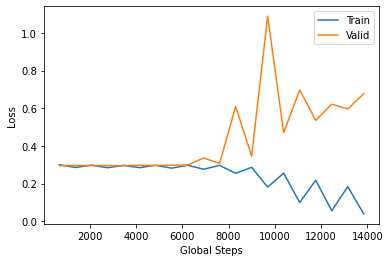

In [33]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [34]:
from sklearn.metrics import roc_curve
def evaluate(model, test_loader):
    y_pred = []
    y_true = []
    y_prob = []
    model.eval()
    with torch.no_grad():
        for (comment,attack ), _ in test_loader:

                comment = comment.type(torch.LongTensor)           
                comment = comment.to(device)
                attack = attack.type(torch.LongTensor)  
                attack = attack.to(device)
                output = model(comment, attack)

                _, output = output
                y_prob.extend(output.tolist())
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(attack.tolist())
    return y_true, y_pred,y_prob    

In [35]:
best_model = BERT().to(device)

load_checkpoint(destination_folder + '/model.pt', best_model)

y_true, y_pred,y_prob = evaluate(best_model, test_iter)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Model loaded from <== Model/model.pt


In [36]:
label_true = []
for i in y_true:
    if i == 1:
        label_true.append([1,0])
    else:
        label_true.append([0,1])

In [37]:
y_prob_final = []
for i in range(len(y_prob)):
    tempA = abs(y_prob[i][0])
    tempB = abs(y_prob[i][1])
    y_prob_final.append(tempB/(tempA+tempB))

Classification Report:
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000       231
           0     0.9165    1.0000    0.9564      2535

    accuracy                         0.9165      2766
   macro avg     0.4582    0.5000    0.4782      2766
weighted avg     0.8399    0.9165    0.8765      2766



F:\conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


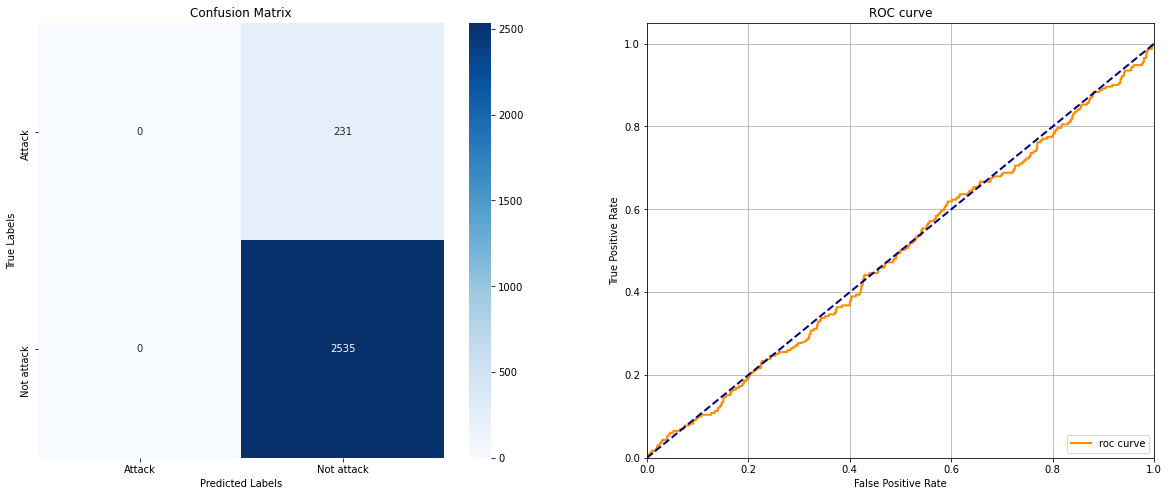

In [38]:
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
test_data2400 = pd.read_csv('Data/test5.csv',sep=',',encoding = "ISO-8859-1")

In [40]:
test_data2400.head()

,comment,attack
0,fucking piece of shit your whole community is...,1.0
1,im not being funny but coronavirus in china ir...,0.0
2,got on the victoria line today to seven sister...,1.0
3,it s appalling that the media amp libtards bit...,1.0
4,dude fuck the chinese man fuck em and if you t...,1.0


In [41]:
test_data2400['attack'] = [int(i) for i in test_data2400['attack']]

In [42]:
# Model parameter
MAX_SEQ_LEN = 75
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('text', text_field),('hate', label_field)]

# TabularDataset

train, valid, test = TabularDataset.splits(path=source_folder, train='GABtrain.csv', validation='GABvalid.csv',
                                           test='test5.csv', format='CSV', fields=fields, skip_header=True)

test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

In [43]:
y_true, y_pred,y_prob = evaluate(best_model, test_iter)

In [44]:
label_true = []
for i in y_true:
    if i == 1:
        label_true.append([1,0])
    else:
        label_true.append([0,1])

In [45]:
y_prob_final = []
for i in range(len(y_prob)):
    tempA = abs(y_prob[i][0])
    tempB = abs(y_prob[i][1])
    y_prob_final.append(tempB/(tempA+tempB))

Classification Report:
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000       678
           0     0.7076    1.0000    0.8288      1641

    accuracy                         0.7076      2319
   macro avg     0.3538    0.5000    0.4144      2319
weighted avg     0.5007    0.7076    0.5865      2319



F:\conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


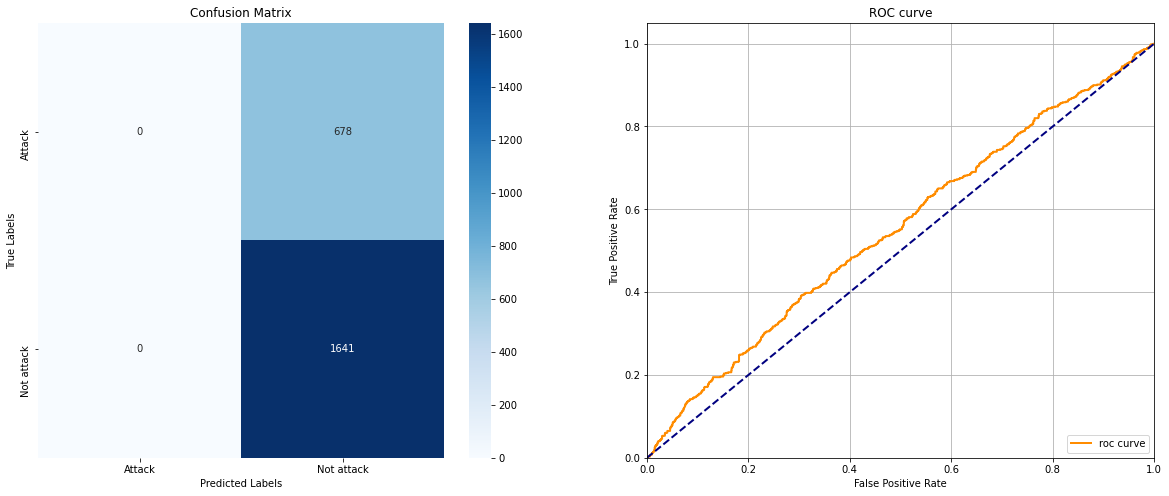

In [46]:
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()